In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Est-ce qu'un ANN peur apprendre à dire si un eleve a son bac ou pas

### Création d'un dataset d'élèves, de notes et leur résultat au bac

In [2]:
# Je veux créer une matrice avec 4 lignes(dont chacune represente une matière) 
#et 200 colonnes pour les exemples d'éleves
n_matieres   = 4
n_eleves     = 200
note_maximal = 20
X = np.random.randint(note_maximal + 1, # pour retourner des nombres entre 0 et 20 (inclus)
                      size=(n_matieres,
                            n_eleves))
X.shape

(4, 200)

In [3]:
# A partir de notre dataset X, je crée mon label Y qui renvoie aux résultats des élèves 
#c'est à dire s'ils passent le bac ou pas

# Création d'un Bac fictif
coeffs = np.array([2, 4, 2, 6])
coeffs = coeffs.reshape(4, 1)

# On calcule le score en faisant la somme des notes * coeffs pour chaque élève
scores_bac = np.dot(X.T, coeffs)

moyennes = scores_bac/np.sum(coeffs)

#Pour avoir une matrice composée de 0(si l'éleve n'a pas le bac) et 1(s'il a le bac) 
Y = (moyennes>=10)*1


Y.shape

(200, 1)

## Architecture du RNN

In [4]:
def init_parametres(n_features_x,
                    n_neuron_l1,
                    n_neuron_l2,
                    n_neuron_last):

    W1 = np.random.randn(n_features_x, n_neuron_l1)*0.01
    b1 = np.zeros((1, n_neuron_l1))
    
    
    W2 = np.random.randn(n_neuron_l1, n_neuron_l2)*0.01
    b2 = np.zeros((1, n_neuron_l2))
    
    
    W3 = np.random.randn(n_neuron_l2, n_neuron_last)*0.01
    b3 = np.zeros((1, n_neuron_last ))
    
    #creation d'un dictionnaire pour stocker les résultats de mes parametres
    parametres = {"W1" : W1,
                 "W2" : W2,
                 "W3" : W3,
                 "b1" : b1,
                 "b2" : b2, 
                 "b3" : b3}

    return parametres

In [5]:
# Mon RNN aura 3 layers: 1 input layer(3), 1, hidden layer(3) et 1 output layer(1)
#JE crée la fonction initialisation des parametres


n_fx    = X.shape[0]
n_n1    = 3
n_n2    = 3
n_nlast = 1  # On prédit deux classes donc on a besoin que d'un neurone en sortie (classif binaire)

parametres = init_parametres(n_fx, n_n1, n_n2, n_nlast)

In [6]:
parametres

{'W1': array([[-0.00039192,  0.00585427,  0.00628352],
        [-0.02022022, -0.01557816,  0.00398435],
        [-0.01674607, -0.00890988, -0.0170249 ],
        [ 0.00420191,  0.00512683,  0.00187969]]),
 'W2': array([[ 0.0071995 , -0.00985984,  0.00320664],
        [ 0.01307984, -0.00379713, -0.01751504],
        [-0.00560956,  0.00759901, -0.00851716]]),
 'W3': array([[-0.0032893 ],
        [-0.01018562],
        [-0.02052741]]),
 'b1': array([[0., 0., 0.]]),
 'b2': array([[0., 0., 0.]]),
 'b3': array([[0.]])}

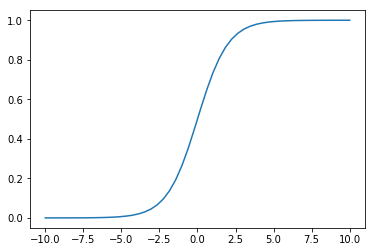

In [7]:
def sigmoid(z):
    S = 1/(1+ np.exp(-z))
    return S

ligne = np.linspace(-10,10)
plt.plot(ligne, sigmoid(ligne))

In [8]:
def forward_pass(X, parametres):
    cache = {}
    
    W1 = parametres["W1"] 
    W2 = parametres["W2"] 
    W3 = parametres["W3"] 
    b1 = parametres["b1"] 
    b2 = parametres["b1"] 
    b3 = parametres["b3"]
    
    
    Z1 = np.dot(X.T, W1)+ b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)+ b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3)+ b3
    A3 = sigmoid(Z3)
    
    cache["Z1"] =Z1
    cache["Z2"] =Z2
    cache["Z3"] =Z3
    cache["A1"] =A1
    cache["A2"] =A2
    cache["A3"] =A3

    
    return A3, cache

In [9]:
A3, cache = forward_pass(X, parametres)
cache

{'Z1': array([[-4.87493185e-01, -1.89772769e-01, -7.54360063e-02],
        [-4.59087323e-01, -1.66823400e-01, -1.49795578e-01],
        [-3.83425372e-01, -2.04829559e-01, -1.34811156e-02],
        [-4.12108038e-01, -1.93069212e-01, -3.66351287e-03],
        [-4.18546341e-01, -1.34214971e-01, -3.86675606e-02],
        [-3.40373313e-01, -1.66872121e-01,  1.43672984e-01],
        [-3.33206820e-01, -1.50653093e-01,  1.75789074e-01],
        [-2.55836484e-01, -1.12288451e-01,  7.81213910e-02],
        [-2.10079528e-01, -2.85508441e-02,  3.69110714e-02],
        [-4.04294224e-02,  1.23727742e-02,  5.98683468e-02],
        [-6.09153343e-01, -3.36744206e-01, -8.07888109e-02],
        [-3.75465551e-01, -1.18065565e-01, -2.35580993e-01],
        [-2.77408729e-01, -7.41419818e-02,  1.55511061e-01],
        [-8.07041977e-02, -2.18597538e-02, -6.43942355e-02],
        [-5.25010973e-01, -2.48881182e-01, -1.65920239e-01],
        [-3.78509263e-01, -2.17348191e-01, -6.64754940e-02],
        [-3.867106

## Calcul cost

In [12]:
def cost(A3, Y):
    #pour calculer la cost j'ai besoin du nombre d'exemples: n_eleves, de la prediction:A3, du label Y
    Loss = np.multiply(np.log(A3), Y) + (1-Y) * np.log(1-A3)
    cost = -np.sum(Loss) / n_eleves
    
    return cost

In [13]:
cost(A3, Y)

0.6941151136132326